<a href="https://colab.research.google.com/github/MakarevichDE/PDA_SOL/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files

files.upload()

In [13]:
us = pd.read_csv('users.csv')

us.head()

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [7]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   age_group           10037 non-null  object
 2   language_preferred  10037 non-null  object
dtypes: object(3)
memory usage: 235.4+ KB


In [5]:
sub = pd.read_csv('subscribers.csv')
sub.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [11]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   subscribing_channel  1856 non-null   object
 2   date_subscribed      1856 non-null   object
 3   date_canceled        577 non-null    object
 4   is_retained          1856 non-null   object
dtypes: object(5)
memory usage: 392.2+ KB


In [6]:
mc = pd.read_csv('marketing_campaign.csv')
mc.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [9]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   variant             10037 non-null  object
 4   language_displayed  10037 non-null  object
 5   converted           10022 non-null  object
dtypes: object(6)
memory usage: 470.6+ KB


In [21]:
df = us.merge(sub, 'outer').merge(mc, 'outer')
df

,user_id,age_group,language_preferred,subscribing_channel,date_subscribed,date_canceled,is_retained,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,0-18 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
1,a1001,19-24 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
2,a1002,24-30 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
3,a1003,30-36 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
4,a1004,36-45 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,45-55 years,German,Email,1/17/18,1/24/18,False,1/17/18,Email,control,German,True
10033,a11033,55+ years,German,Email,1/17/18,NaN,True,1/17/18,Email,control,German,True
10034,a11034,55+ years,German,Email,1/17/18,NaN,True,1/5/18,Instagram,control,German,False
10035,a11035,0-18 years,German,Email,1/17/18,NaN,True,1/17/18,Email,control,German,True


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   age_group            10037 non-null  object
 2   language_preferred   10037 non-null  object
 3   subscribing_channel  1856 non-null   object
 4   date_subscribed      1856 non-null   object
 5   date_canceled        577 non-null    object
 6   is_retained          1856 non-null   object
 7   date_served          10021 non-null  object
 8   marketing_channel    10022 non-null  object
 9   variant              10037 non-null  object
 10  language_displayed   10037 non-null  object
 11  converted            10022 non-null  object
dtypes: object(12)
memory usage: 1019.4+ KB


In [30]:
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])
df['date_canceled'] = pd.to_datetime(df['date_canceled'])
df['date_served'] = pd.to_datetime(df['date_served'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   age_group            10037 non-null  object        
 2   language_preferred   10037 non-null  object        
 3   subscribing_channel  1856 non-null   object        
 4   date_subscribed      1856 non-null   datetime64[ns]
 5   date_canceled        577 non-null    datetime64[ns]
 6   is_retained          1856 non-null   object        
 7   date_served          10021 non-null  datetime64[ns]
 8   marketing_channel    10022 non-null  object        
 9   variant              10037 non-null  object        
 10  language_displayed   10037 non-null  object        
 11  converted            10022 non-null  object        
dtypes: datetime64[ns](3), object(9)
memory usage: 1019.4+ KB


3. Определить эффективность маркетинговых каналов по привлечению платящих игроков.

Text(0.5, 1.0, 'Конверсия в покупку, True - пользователь совершил покупку, False - нет')

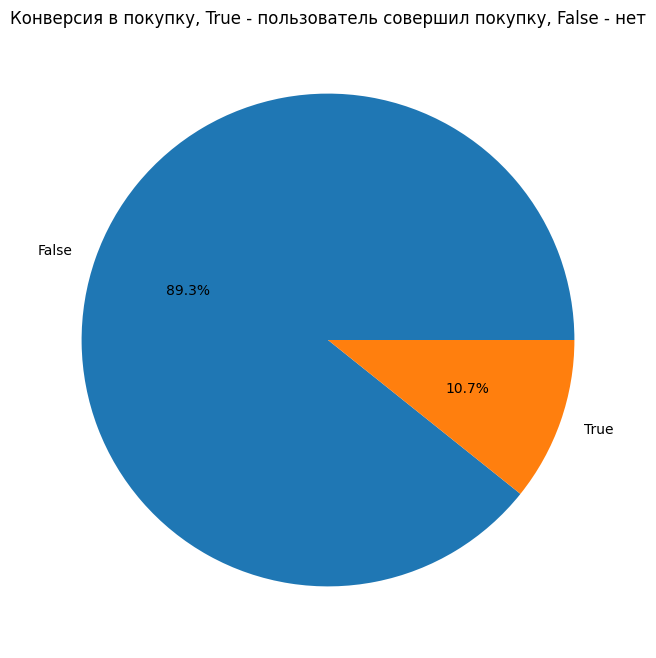

In [26]:
df1 = df.groupby('converted').size()

df1.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.1f%%')
plt.title("Конверсия в покупку, True - пользователь совершил покупку, False - нет")

In [37]:
print(df.date_subscribed.min())
print(df.date_canceled.max())

2018-01-01 00:00:00
2018-05-09 00:00:00


Вывод: Конверсия составила 10%, что является довольно хорошим показателем. Для более точного определения эффективности маркетинговых каналов необходимо взять данные хотя бы за год (приведенные данные лишь за 5 месяцев), чтобы сравнить эффективность.

4. Определить количество игроков в каждой возрастной группе.

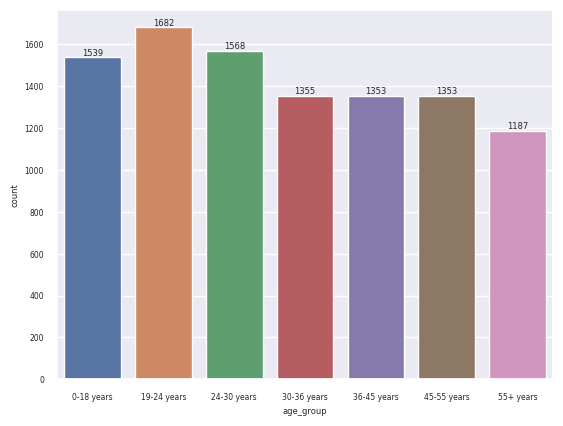

In [43]:
sns.set(font_scale=0.5)
ax = sns.countplot(x='age_group', data=df)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Вывод: количество представлено на графике.

5. Определить самую раннюю дату подписки на сервис.

In [44]:
print(df.date_subscribed.min())

2018-01-01 00:00:00


6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).

In [46]:
filtered_df = df.loc[df['is_retained'] == 1]

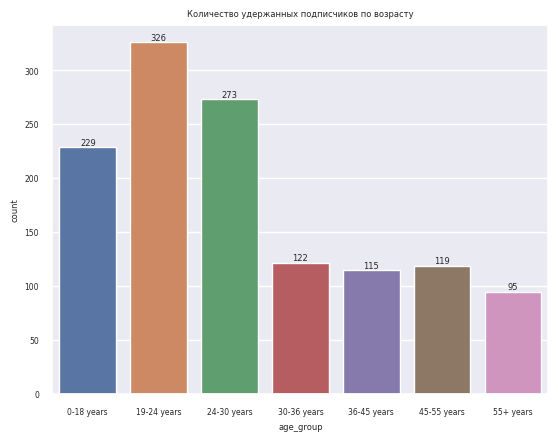

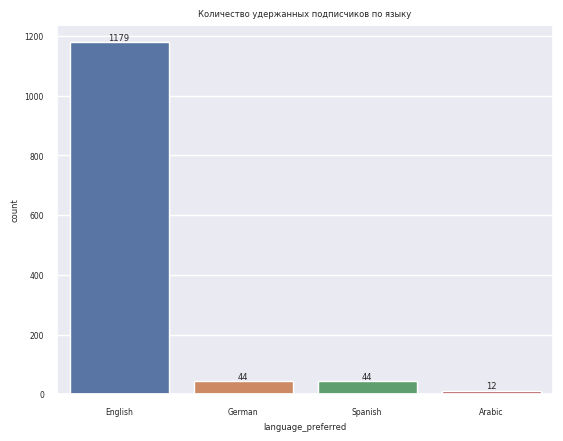

In [58]:
ax1, ax2 = plt.subplots(1)
sns.set(font_scale=0.5)
ax1 = sns.countplot(x='age_group', data=filtered_df)
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Количество удержанных подписчиков по возрасту")
plt.show(ax1)
ax2 = sns.countplot(x='language_preferred', data=filtered_df)
for label in ax2.containers:
    ax2.bar_label(label)
plt.title("Количество удержанных подписчиков по языку")
plt.show(ax2)

Вывод: Можно заметить, что целевая аудитория - говорящие на английском языке люди преимущественно 19-24 лет.

7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [71]:
len(df[(df['variant']=='control') & (df['converted']==1)])

371

In [72]:
len(df[(df['variant']=='personalization') &(df['converted']==1)])

705

In [73]:
df2 = pd.DataFrame({'impressions': [10037, 10037],
                   'clicks': [371,705]},
                  index=['var_A', 'var_B'])
df2.head()

,impressions,clicks
var_A,10037,371
var_B,10037,705


In [74]:
df2['no_clicks'] = df2['impressions'] - df2['clicks']
df2 = df2.drop(['impressions'], axis = 1)
df2.head()

,clicks,no_clicks
var_A,371,9666
var_B,705,9332


In [75]:
import scipy.stats as stats
result = stats.chi2_contingency(df2, correction = False)
chisq, pvalue = result[:2]
print('chisq = {}, pvalue = {}'.format(chisq, pvalue))

chisq = 109.54856645054791, pvalue = 1.2305237452645538e-25


Вывод: поскольку значимость A/B теста 0.00000000000000000000000012305237452645538 менее допустимого уровня значимости 0,05, то нулевую гипотезу о равенстве конверсий в группах можно отклонить, т.е. группа personalization - действительно генерирует статистически больше кликов, чем группа control.
Краткий ответ: больше конверсия в варианте personalization, это значимо статистически.

**Задание 2.** Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [76]:
# Задаем целевую функцию:
# Цехом производится два вида продукции:
# x0 — стулья, от 45 долларов
# x1 — столы, от 80 долларов

def value(x):
    return - 45*x[0] - 80*x[1]

In [150]:
# Задаем систему ограничений:
# На производство стул и стола требуется:
# стул: 10 чел * час,
# стол: 15 чел * час,
# стул: 5 единиц материала,
# стол: 20 единиц материала,
# max человеко-часов: 450, max единиц материала: 400

neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([400 - 5  * x [0] - 20 * x [1],
                                         450 - 10 * x [0] - 15 * x [1]])}

In [141]:
# Формальное ограничение — выпуск продукции должен быть только положительным:
from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

In [145]:
# Максимизируем функцию ежемесячной прибыли
from scipy.optimize import minimize
x0 = np.array([10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[24. 14.]


In [149]:
# Посчитаем максимизированную прибыль x = (24,14) :
print('максимизированная прибыль составит:', -1*value([24, 14]),'долларов')

максимизированная прибыль составит: 2200 долларов


**Задание 3.** Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 0.4$, day3 0.6$, day7 0.8$, day14 1.10$ , day21 1.30$, day30 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

In [82]:
df3 = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'retained': [0.4,0.6,0.8,1.10,1.30,1.40]})
df3.head(6)

,day,retained
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


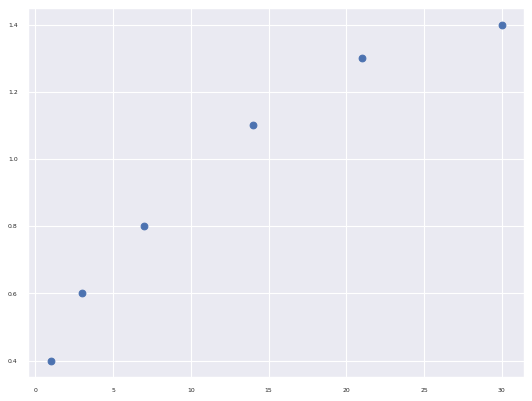

In [89]:
# определяем тип возможной кривой по диаграмме рассеяния
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df3['day'], df3['retained'], label="Original Data" )

In [121]:
# задаем аппроксимирующую логарифмическую функцию
def log_func( x, a, b):
    return a * np.log10(x)+b

In [122]:
# задаем аппроксимирующую показательную функцию
def exp_func( x, a, b):
    return a * b**x

In [123]:
# подбираем оптимальные параметры логарифмической функции
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df3['day'], df3['retained'])

In [124]:
# подбираем оптимальные параметры показательной функции
exp_popt, exp_pcov = curve_fit(exp_func, df3['day'], df3['retained'])

In [125]:
# задаем точку прогноза - сколько денег принесет пользователь на 90й день
projection_endpoint = 90

In [126]:
# задаем значения функции x с помощью метода np.arange и параметры подобранной кривой
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )

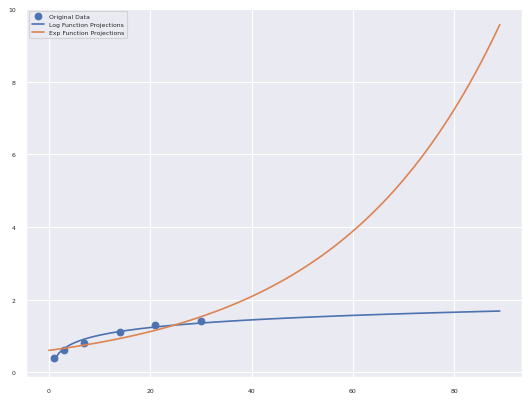

In [130]:
# смотрим график исходных данных и полученных кривых
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df3['day'], df3['retained'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

In [135]:
# делаем прогноз сколько денег принесет пользователь на 90й день
print('Прогноз среднего накопленного дохода через 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз среднего накопленного дохода через 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз среднего накопленного дохода через 90 дней по log модели 2.0
Прогноз среднего накопленного дохода через 90 дней по exp модели 10.0


In [132]:
# отбираем среди прогнозов значения за 0,1,7,14,21 и 30 дни
y_log_pred = [log_y_projected[ i ] for i in list(df3['day'])]
y_log_pred

[0.3182915349828918,
 0.6525362979654962,
 0.9103204821057709,
 1.1212054480469356,
 1.2445652450883753,
 1.353080991114816]

In [133]:
# отбираем среди прогнозов значения за 0,1,7,14,21 и 30 дни
y_exp_pred = [exp_y_projected[ i ] for i in list(df3['day'])]
y_exp_pred

[0.6193285013669545,
 0.659088716032839,
 0.7464307044090908,
 0.9280456295448732,
 1.153849493904676,
 1.5266933282102846]

Вывод: логарифмическая функция аппроксимирует исследуемую зависимость с меньшей среднеквадратической ошибкой, поэтому целесообразнее использовать для прогноза только данную функцию.

In [138]:
print('На 90й день пользователь в среднем принесет денег (в долларах) по log модели:', round(log_y_projected[89],0))

На 90й день пользователь в среднем принесет денег (в долларах) по log модели: 2.0
